In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
from urllib.request import urlretrieve

In [44]:
# def get_fremont_data(filename = "Fremont.csv", url = URL, force_download = False):
#     if force_download or not os.path.exists(filename):
#         urlretrieve(URL, "Fremont.csv")
        
#     data = pd.read_csv("Fremont.csv", index_col = "Date", parse_dates = True)
#     data.columns = ["Total", "East", "West"]
#     return data
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [45]:
#urlretrieve(URL, "Fremont.csv")
#data = get_fremont_data(URL)
from data import get_fremont_data

In [46]:
#data = pd.read_csv("Fremont.csv", index_col = "Date", parse_dates = True)

In [47]:
data.head()

Total  East  West
Date                                  
2019-11-01 00:00:00   12.0   7.0   5.0
2019-11-01 01:00:00    7.0   0.0   7.0
2019-11-01 02:00:00    1.0   0.0   1.0
2019-11-01 03:00:00    6.0   6.0   0.0
2019-11-01 04:00:00    6.0   5.0   1.0

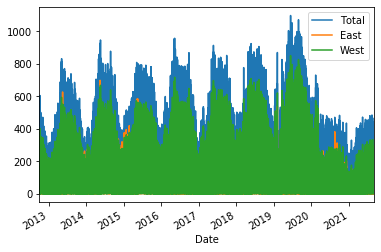

In [48]:
data.plot()

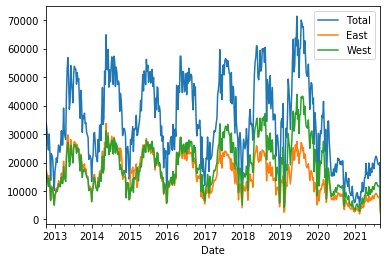

In [49]:
data.resample("W").sum().plot()

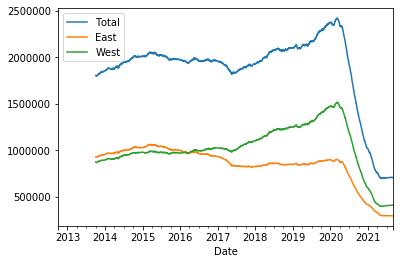

In [50]:
data.resample("D").sum().rolling(365).sum().plot()

(0, 2526609.9)

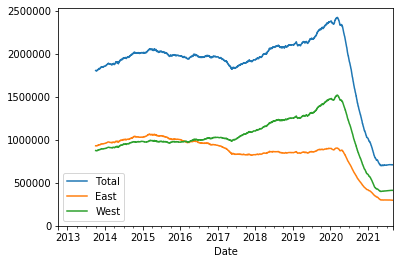

In [51]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

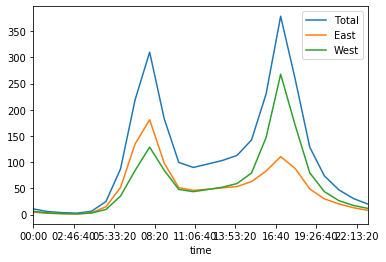

In [52]:
data.groupby(data.index.time).mean().plot()

In [53]:
pivoted = data.pivot_table("Total", index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
00:00:00        13.0        18.0        11.0        15.0        11.0
01:00:00        10.0         3.0         8.0        15.0        17.0
02:00:00         2.0         9.0         7.0         9.0         3.0
03:00:00         5.0         3.0         4.0         3.0         6.0
04:00:00         7.0         8.0         9.0         5.0         3.0

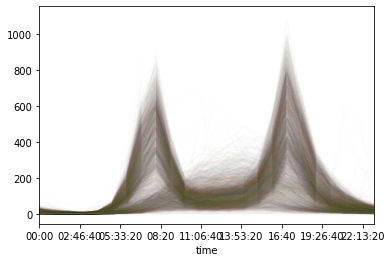

In [54]:
pivoted.plot(legend = False, alpha = 0.01)
